In [75]:
import json

In [76]:
# with open("./Sarcasm_Headlines_Dataset.json", 'r') as f:
#     datastore = json.load(f)
def parse_data(file):
    for l in open(file, 'r'):
        yield json.loads(l)
        # yield --> https://www.geeksforgeeks.org/use-yield-keyword-instead-return-keyword-python/

datastore = list(parse_data('./Sarcasm_Headlines_Dataset.json'))

In [77]:
# datastore

In [78]:
sentences = []
labels = []
urls = []
for item in datastore:
    sentences.append(item['headline'])
    labels.append(item['is_sarcastic'])
    urls.append(item['article_link'])

In [79]:
# sentences

In [80]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import tensorflow as tf
from tensorflow.keras.layers import Embedding
import numpy as np

In [81]:
vocab_size = 10000
embedding_dim = 16
max_length = 100
truncating_type = 'post'
padding_type = 'post'
oov_tok = "<OOV>"
training_size = 20000

In [82]:
training_sentences = sentences[0:training_size]
testing_sentences = sentences[training_size:]
training_labels = labels[0:training_size]
testing_labels = labels[training_size:]

In [83]:
# tokenizer = Tokenizer(oov_token = "<OOV>")
# tokenizer.fit_on_texts(sentences)
# word_index = tokenizer.word_index
# sequences = tokenizer.texts_to_sequences(sentences)
# padded = pad_sequences(sequences, padding = 'post')
tokenizer = Tokenizer(num_words=vocab_size, oov_token=oov_tok)
tokenizer.fit_on_texts(training_sentences)

word_index = tokenizer.word_index


training_sequences = tokenizer.texts_to_sequences(training_sentences)
training_padded = pad_sequences(training_sequences, maxlen=max_length, padding=padding_type, truncating=truncating_type)

testing_sequences = tokenizer.texts_to_sequences(testing_sentences)
testing_padded = pad_sequences(testing_sequences, maxlen=max_length, padding=padding_type, truncating=truncating_type)

In [84]:
training_padded = np.array(training_padded)
testing_padded = np.array(testing_padded)
training_labels = np.array(training_labels)
testing_labels = np.array(testing_labels)

In [85]:
model_sentiment_analysis = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length = max_length),
    tf.keras.layers.GlobalAveragePooling1D(), 
    tf.keras.layers.Dense(24, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
# Embedding layer enables us to convert each word into a fixed length vector of defined size. 
# The resultant vector is a dense one with having real values instead of just 0's and 1's. 
# The fixed length of word vectors helps us to represent words in a better way along with reduced dimensions
model_sentiment_analysis.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [86]:
model_sentiment_analysis.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_4 (Embedding)     (None, 100, 16)           160000    
                                                                 
 global_average_pooling1d_4   (None, 16)               0         
 (GlobalAveragePooling1D)                                        
                                                                 
 dense_8 (Dense)             (None, 24)                408       
                                                                 
 dense_9 (Dense)             (None, 1)                 25        
                                                                 
Total params: 160,433
Trainable params: 160,433
Non-trainable params: 0
_________________________________________________________________


In [87]:
num_epochs = 30
history = model_sentiment_analysis.fit(training_padded, training_labels, epochs=num_epochs, validation_data=(testing_padded, testing_labels), verbose=2)
# verbose = 2, means--> one line per epoch i.e. epoch no./total no. of epochs.
# Verbose is a general programming term for produce lots of logging output. 
# You can think of it as asking the program to "tell me everything about what 
# you are doing all the time". Just set it to true and see what happens.

Epoch 1/30
625/625 - 2s - loss: 0.6688 - accuracy: 0.5845 - val_loss: 0.6069 - val_accuracy: 0.8019 - 2s/epoch - 4ms/step
Epoch 2/30
625/625 - 2s - loss: 0.4559 - accuracy: 0.8232 - val_loss: 0.3922 - val_accuracy: 0.8383 - 2s/epoch - 3ms/step
Epoch 3/30
625/625 - 2s - loss: 0.3211 - accuracy: 0.8727 - val_loss: 0.3545 - val_accuracy: 0.8524 - 2s/epoch - 3ms/step
Epoch 4/30
625/625 - 2s - loss: 0.2697 - accuracy: 0.8935 - val_loss: 0.3444 - val_accuracy: 0.8541 - 2s/epoch - 3ms/step
Epoch 5/30
625/625 - 2s - loss: 0.2326 - accuracy: 0.9110 - val_loss: 0.3474 - val_accuracy: 0.8471 - 2s/epoch - 3ms/step
Epoch 6/30
625/625 - 2s - loss: 0.2047 - accuracy: 0.9223 - val_loss: 0.3441 - val_accuracy: 0.8580 - 2s/epoch - 3ms/step
Epoch 7/30
625/625 - 2s - loss: 0.1829 - accuracy: 0.9311 - val_loss: 0.3533 - val_accuracy: 0.8544 - 2s/epoch - 3ms/step
Epoch 8/30
625/625 - 2s - loss: 0.1637 - accuracy: 0.9390 - val_loss: 0.3736 - val_accuracy: 0.8474 - 2s/epoch - 3ms/step
Epoch 9/30
625/625 - 2s 

In [112]:
sentences = [
    "granny started to fear spiders in the garden might be real",
    "the weather today is bright and sunny"
]

In [113]:
sequences = tokenizer.texts_to_sequences(sentences)
padded = pad_sequences(sequences, maxlen=max_length, padding=padding_type, truncating=truncating_type)
ans = model_sentiment_analysis.predict(padded)

In [114]:
print(ans)
for probablity in ans:
    if probablity >= 0.1:
        print("Sarcastic")
    else:
        print("Not Sarcastic")

[[9.8579407e-01]
 [2.3373961e-04]]
Sarcastic
Not Sarcastic


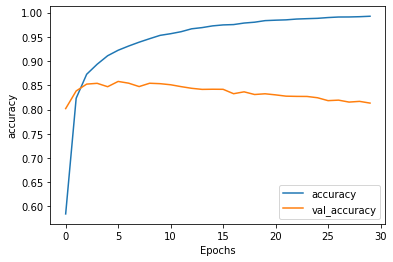

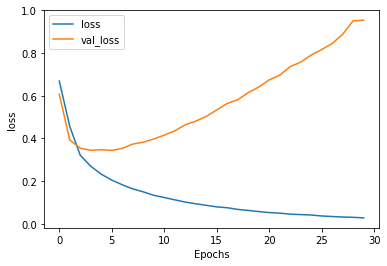

In [115]:
import matplotlib.pyplot as plt


def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()
  
plot_graphs(history, "accuracy")
plot_graphs(history, "loss")